In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,f1_score,accuracy_score,recall_score,precision_score

## Banque : Quels clients risquent de faire défaut sur leurs prêts ?

In [2]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Analyser les données

In [3]:
df['Age'].describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

In [4]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
df.shape

(5000, 14)

In [6]:
df['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

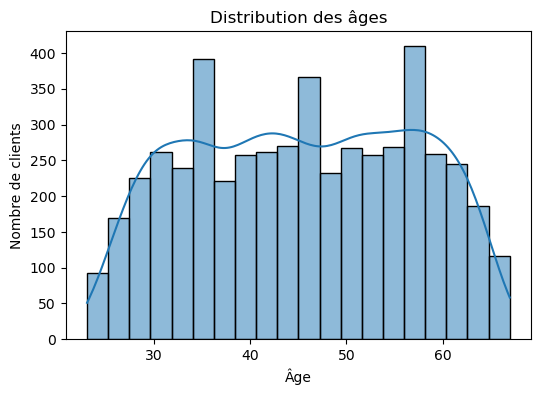

In [7]:
# Histogramme des âges
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution des âges')
plt.xlabel('Âge')
plt.ylabel('Nombre de clients')
plt.show()

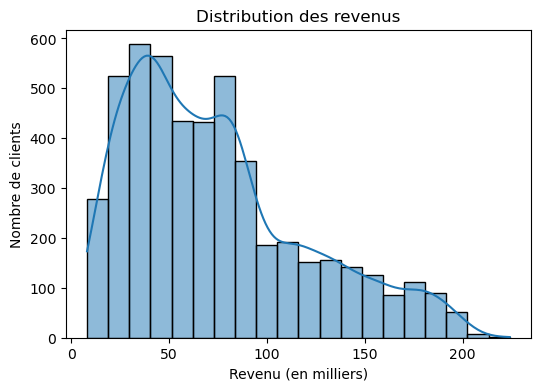

In [8]:
# Répartition du revenu
plt.figure(figsize=(6, 4))
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Distribution des revenus')
plt.xlabel('Revenu (en milliers)')
plt.ylabel('Nombre de clients')
plt.show()

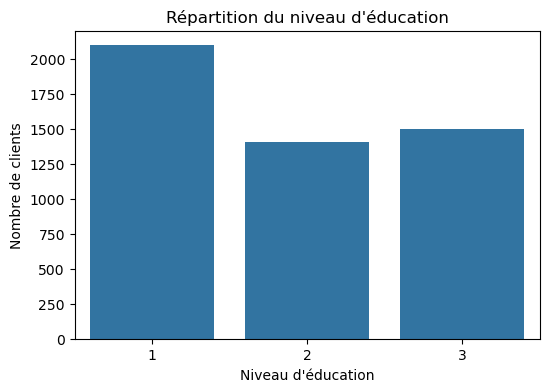

In [9]:
# Répartition de l'éducation
plt.figure(figsize=(6, 4))
sns.countplot(x='Education', data=df)
plt.title('Répartition du niveau d\'éducation')
plt.xlabel('Niveau d\'éducation')
plt.ylabel('Nombre de clients')
plt.show()

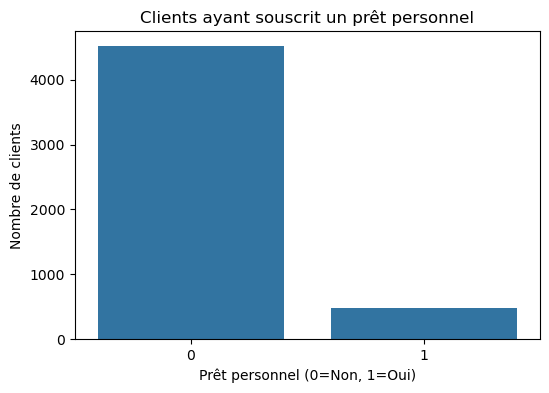

In [10]:
# Proportion de clients ayant un prêt personnel
plt.figure(figsize=(6, 4))
sns.countplot(x='Personal Loan', data=df)
plt.title('Clients ayant souscrit un prêt personnel')
plt.xlabel('Prêt personnel (0=Non, 1=Oui)')
plt.ylabel('Nombre de clients')
plt.show()

In [11]:
# Détection des valeurs aberrantes avec la méthode de l'écart interquartile (IQR)
numeric_cols = df.select_dtypes(include=[np.number]).columns
outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outliers[col] = outlier_count

outliers

{'ID': 0,
 'Age': 0,
 'Experience': 0,
 'Income': 96,
 'ZIP Code': 1,
 'Family': 0,
 'CCAvg': 324,
 'Education': 0,
 'Mortgage': 291,
 'Personal Loan': 480,
 'Securities Account': 522,
 'CD Account': 302,
 'Online': 0,
 'CreditCard': 0}

In [12]:
df.shape

(5000, 14)

In [13]:
numeric_cols

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

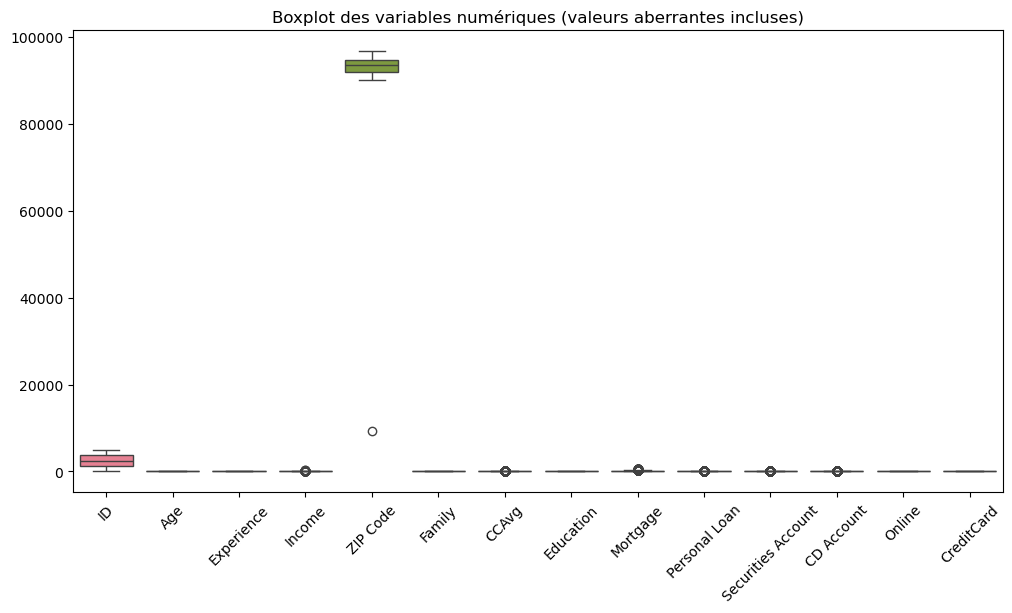

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot des variables numériques (valeurs aberrantes incluses)")
plt.xticks(rotation=45)
plt.show()

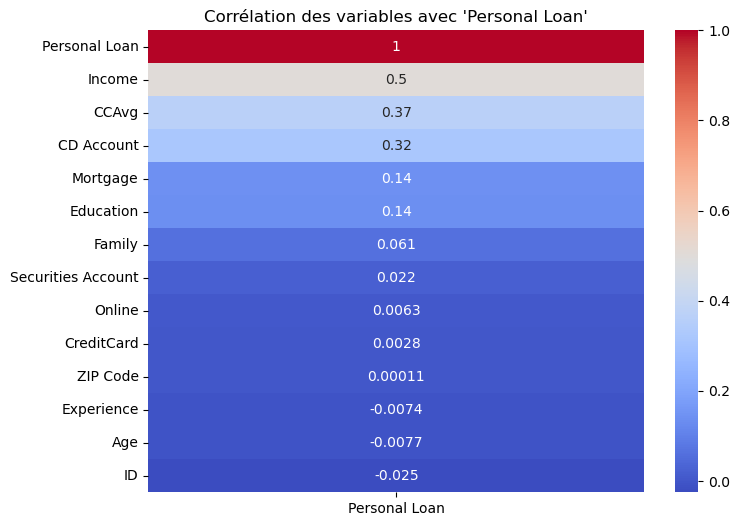

In [15]:
# Matrice de corrélation centrée sur la variable cible 'Personal Loan'
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[['Personal Loan']].sort_values(by='Personal Loan', ascending=False), annot=True, cmap='coolwarm')
plt.title("Corrélation des variables avec 'Personal Loan'")
plt.show()

## Creation de modèle de classification

In [16]:
y = df['Personal Loan']
X = df.drop(['Personal Loan', 'ID', 'ZIP Code'], axis=1)  

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.98      0.92      0.95       105

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



In [19]:
comparison = pd.DataFrame({'Valeur réelle': y_test.values, 'Valeur prédite': y_pred})
comparison.head(20)

,Valeur réelle,Valeur prédite
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


## Banque : Quels clients présentent un risque de crédit élevé ?

In [20]:
data = pd.read_csv('credit_risk_dataset.csv')
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [21]:
data['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

In [22]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<Axes: xlabel='loan_intent', ylabel='count'>

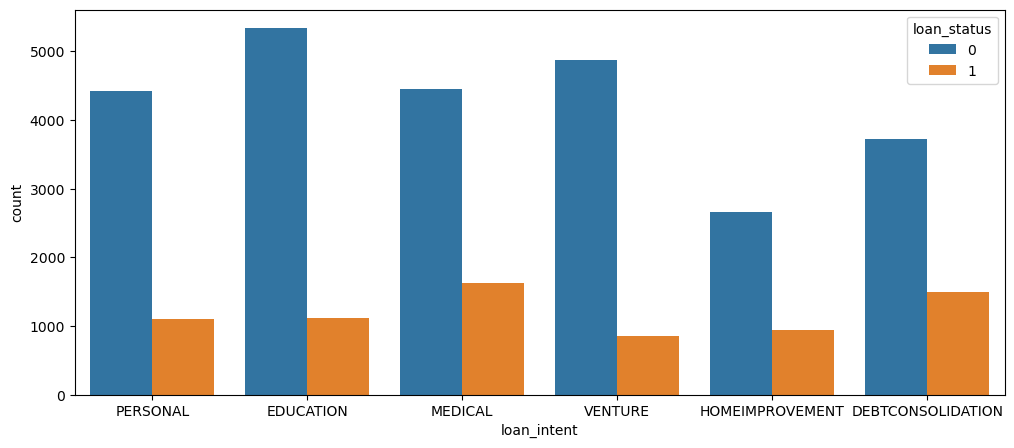

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(data=data,x='loan_intent',hue='loan_status')

/var/folders/zl/71xrz48s5c1glhcyx_5gvjqc0000gn/T/ipykernel_16778/2479130968.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='loan_status',palette='rainbow')


<Axes: xlabel='loan_status', ylabel='count'>

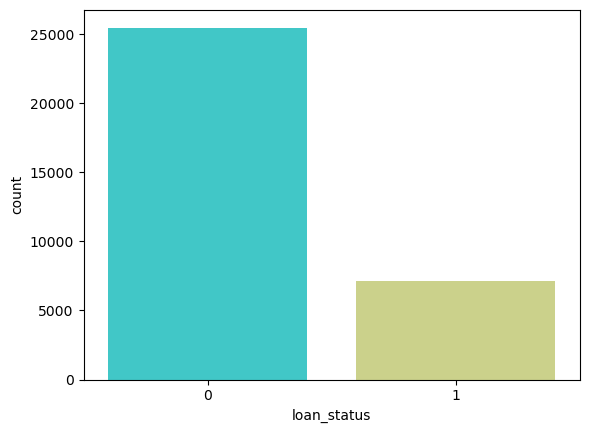

In [24]:
sns.countplot(data=data,x='loan_status',palette='rainbow')

In [25]:
data['loan_status'].sum()/data['loan_status'].count()*100

21.816396059052824

Les données sont mal distribuées

## DATA PROCESSING

In [26]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

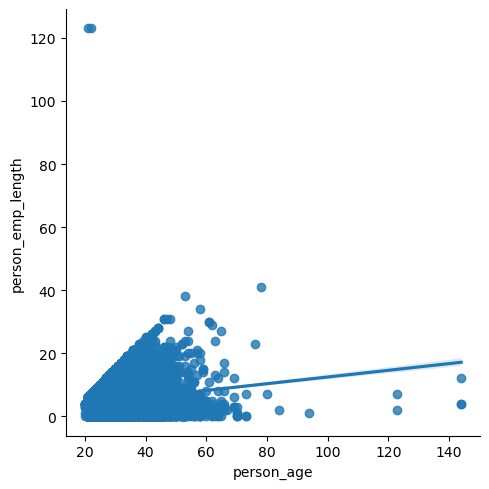

In [27]:
sns.lmplot(data=data,x='person_age',y='person_emp_length')


In [28]:
# Copie du DataFrame pour éviter les modifications sur l'original

dfcpy=data.copy()

In [29]:
def fill_length(x):
    if x.isnull().any():
        return round(0.1631056*x[0])
    else:
        return x[1]

In [30]:
dfcpy['person_emp_length']=data[['person_age','person_emp_length']].apply(fill_length,axis=1)

/var/folders/zl/71xrz48s5c1glhcyx_5gvjqc0000gn/T/ipykernel_16778/1569467088.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return x[1]
/var/folders/zl/71xrz48s5c1glhcyx_5gvjqc0000gn/T/ipykernel_16778/1569467088.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return round(0.1631056*x[0])


/var/folders/zl/71xrz48s5c1glhcyx_5gvjqc0000gn/T/ipykernel_16778/1536639638.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfcpy,x='loan_grade',y='loan_int_rate',palette='rainbow')


<Axes: xlabel='loan_grade', ylabel='loan_int_rate'>

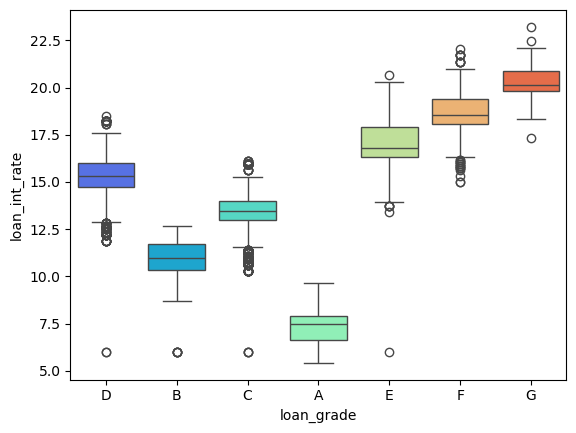

In [31]:
sns.boxplot(data=dfcpy,x='loan_grade',y='loan_int_rate',palette='rainbow')


In [32]:
dfcpy.groupby('loan_grade').mean(numeric_only=True)['loan_int_rate']

loan_grade
A     7.327651
B    10.995555
C    13.463542
D    15.361448
E    17.009455
F    18.609159
G    20.251525
Name: loan_int_rate, dtype: float64

In [33]:
def fill_rate(x):
    if x.isnull().any():
        if x[0]=='A':
            return 7.33
        elif x[0]=='B':
            return 11.00
        elif x[0]=='C':
            return 13.46
        elif x[0]=='D':
            return 15.36
        elif x[0]=='E':
            return 17.01
        elif x[0]=='F':
            return 18.61
        else:
            return 20.25
    else:
        return x[1]

In [34]:
dfcpy['loan_int_rate']=data[['loan_grade','loan_int_rate']].apply(fill_rate,axis=1)

/var/folders/zl/71xrz48s5c1glhcyx_5gvjqc0000gn/T/ipykernel_16778/790178786.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return x[1]
/var/folders/zl/71xrz48s5c1glhcyx_5gvjqc0000gn/T/ipykernel_16778/790178786.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[0]=='A':
/var/folders/zl/71xrz48s5c1glhcyx_5gvjqc0000gn/T/ipykernel_16778/790178786.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif x[0]=='B':
/var/folders

In [35]:
own_dummy=pd.get_dummies(dfcpy['person_home_ownership'],drop_first=True)
intent_dummy=pd.get_dummies(dfcpy['loan_intent'],drop_first=True)
grade_dummy=pd.get_dummies(dfcpy['loan_grade'],drop_first=True)
default_dummy=pd.get_dummies(dfcpy['cb_person_default_on_file'],drop_first=True)

In [36]:
dfcpy=pd.concat([dfcpy,own_dummy,intent_dummy,grade_dummy,default_dummy],axis=1)

In [37]:
dfcpy.drop(list(dfcpy.select_dtypes('object').columns),axis=1,inplace=True)

In [38]:
from sklearn.model_selection import train_test_split
X = dfcpy.drop('loan_status', axis=1)
y = dfcpy['loan_status']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,f1_score,accuracy_score,recall_score,precision_score

In [41]:
models=[LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(),LGBMClassifier()]
f1=[]
accuracy=[]
recall=[]
precision=[]
for model in models:
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    f1.append(f1_score(y_test,pred))
    accuracy.append(accuracy_score(y_test,pred))
    recall.append(recall_score(y_test,pred))
    precision.append(precision_score(y_test,pred))

[LightGBM] [Info] Number of positive: 4955, number of negative: 17851
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 22806, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217267 -> initscore=-1.281662
[LightGBM] [Info] Start training from score -1.281662


In [42]:
results=pd.DataFrame(index=['Logistic Regression','KNN','SVM','Decision Tree','Random Forest','XGBoost','LightGBM'])

In [43]:
results['F1 score']=f1
results['Accuracy']=accuracy
results['Recall']=recall
results['Precision']=precision

<Axes: >

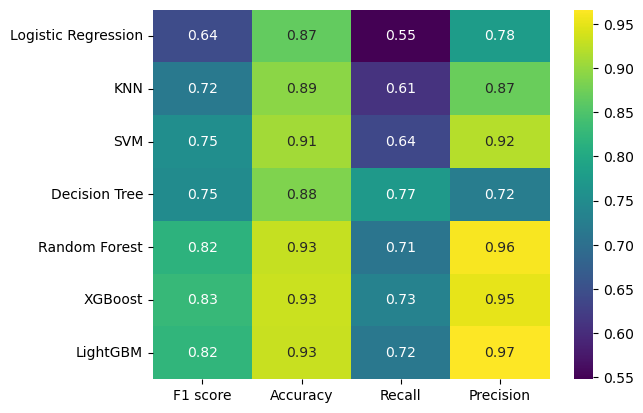

In [44]:
sns.heatmap(results,cmap='viridis',annot=True)

In [45]:
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier()
param_grid = {
    'n_estimators': [300,400,500]
}

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ...................................n_estimators=300; total time=   2.7s
[CV] END ...................................n_estimators=300; total time=   2.7s
[CV] END ...................................n_estimators=300; total time=   2.7s
[CV] END ...................................n_estimators=300; total time=   2.7s
[CV] END ...................................n_estimators=300; total time=   2.7s
[CV] END ...................................n_estimators=400; total time=   3.6s
[CV] END ...................................n_estimators=400; total time=   3.6s
[CV] END ...................................n_estimators=400; total time=   3.6s
[CV] END ...................................n_estimators=400; total time=   3.7s
[CV] END ...................................n_estimators=400; total time=   3.6s
[CV] END ...................................n_estimators=500; total time=   4.7s
[CV] END ...................................n_est

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [300, 400, 500]}, verbose=2)

In [46]:
pred=grid_search.predict(X_test)

In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7622
           1       0.96      0.71      0.82      2153

    accuracy                           0.93      9775
   macro avg       0.94      0.85      0.89      9775
weighted avg       0.93      0.93      0.93      9775



In [48]:
xgb=XGBClassifier()
param_grid = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.05,0.025]
}

grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   0.2s
[CV] END ................learning_rate=0.1, n_est

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.05, 0.025],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [49]:
pred=grid_search.predict(X_test)

In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7622
           1       0.96      0.72      0.82      2153

    accuracy                           0.93      9775
   macro avg       0.94      0.86      0.89      9775
weighted avg       0.93      0.93      0.93      9775



In [51]:
lgbm=LGBMClassifier()
param_grid = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.05,0.025]
}

grid_search = GridSearchCV(estimator = lgbm, param_grid = param_grid, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Info] Number of positive: 3964, number of negative: 14280
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 969
[LightGBM] [Info] Number of data points in the train set: 18244, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217277 -> initscore=-1.281606
[LightGBM] [Info] Start training from score -1.281606
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[LightGBM] [Info] Number of positive: 3964, number of negative: 14281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightG

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.025],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [52]:
pred=grid_search.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7622
           1       0.97      0.71      0.82      2153

    accuracy                           0.93      9775
   macro avg       0.95      0.85      0.89      9775
weighted avg       0.93      0.93      0.93      9775



In [53]:
from sklearn.metrics import roc_curve,roc_auc_score

logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
pred_probs = logmodel.predict_proba(X_test)[:,1]

Text(0.5, 1.0, 'Logistic Regression ROC Curve')

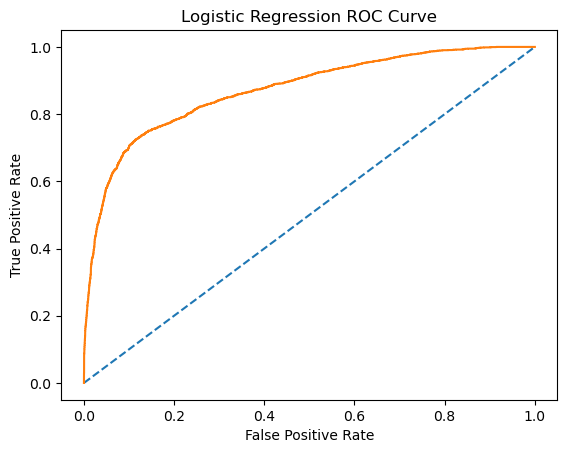

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, pred_probs)

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Logistic Regression ROC Curve')

In [55]:
roc_auc_score(y_test,pred_probs)

0.870722819013531

In [56]:
xgb=XGBClassifier(n_estimators=200,learning_rate=0.1)
xgb.fit(X_train,y_train)
pred_probs = xgb.predict_proba(X_test)[:,1]

Text(0.5, 1.0, 'XGBoost ROC Curve')

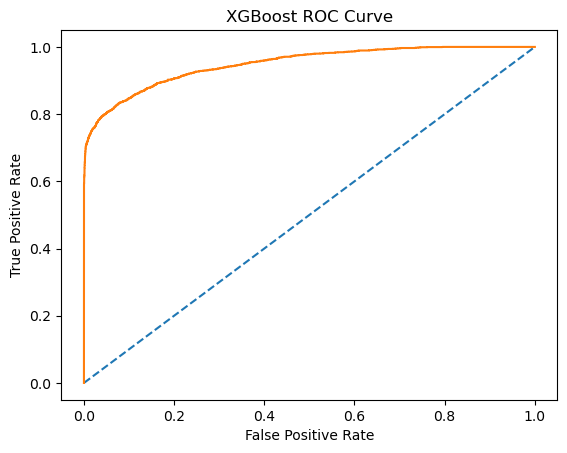

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, pred_probs)

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('XGBoost ROC Curve')

In [58]:
roc_auc_score(y_test,pred_probs)

0.9486376310879487

In [59]:
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)
pred_probs=lgbm.predict_proba(X_test)[:,1]

[LightGBM] [Info] Number of positive: 4955, number of negative: 17851
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 22806, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217267 -> initscore=-1.281662
[LightGBM] [Info] Start training from score -1.281662


Text(0.5, 1.0, 'LightGBM ROC Curve')

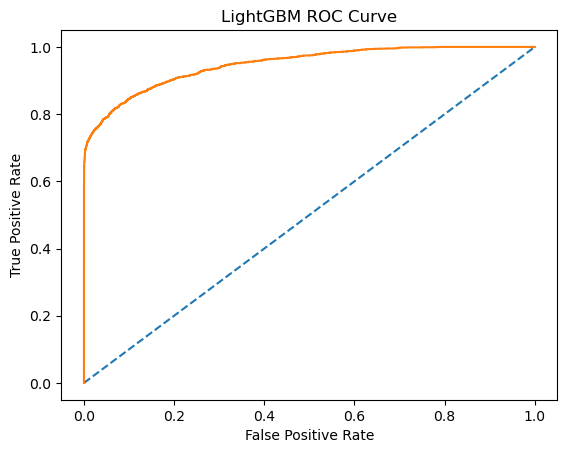

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, pred_probs)

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('LightGBM ROC Curve')

In [61]:
roc_auc_score(y_test,pred_probs)

0.9478366641751216

Ce bloc-notes explore l'évaluation du risque de crédit en aidant les institutions financières à prendre des décisions de prêt éclairées. L'ensemble de données contenant 11 ratios financiers et une variable cible “loan_status” a été chargé dans un DataFrame pandas. Le jeu de données comporte 32581 enregistrements et 12 caractéristiques. Nous avons effectué une analyse exploratoire des données (AED) pour comprendre visuellement les données. Les données données avaient quelques valeurs manquantes. Nous les avons comblées à l'aide de différentes techniques. Les données comportaient également des caractéristiques non numériques. Nous les avons converties en données numériques à l'aide de la fonction get_dummies(). Nous avons ensuite procédé à une séparation formation-test. Nous avons appliqué différents modèles d'apprentissage automatique et évalué leurs performances. Random Forest, XGBoost et LightGBM ont obtenu de très bons résultats malgré la distribution non uniforme des données. XGBoost et LightGBM sont les deux algorithmes d'apprentissage automatique les plus utilisés dans le monde de la science des données. Nous avons ensuite effectué une recherche par grille pour trouver les meilleurs hyperparamètres et améliorer les performances du modèle. Nous avons également évalué certains modèles à l'aide de la courbe ROC et du score ROC-AUC.

## Santé : Quels patients risquent d’être réadmis à l’hôpital ?

In [62]:
health_df = pd.read_csv('heart_disease_uci.csv')
health_df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [63]:
health_df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [64]:
health_df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [65]:
health_df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [66]:
health_num = health_df.select_dtypes(include=[np.number])
health_num.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [67]:
health_num.head()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
0,1,63,145.0,233.0,150.0,2.3,0.0,0
1,2,67,160.0,286.0,108.0,1.5,3.0,2
2,3,67,120.0,229.0,129.0,2.6,2.0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0


In [68]:
health_df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [69]:
health_num.isnull().sum()/health_num.shape[0]*100

id           0.000000
age          0.000000
trestbps     6.413043
chol         3.260870
thalch       5.978261
oldpeak      6.739130
ca          66.413043
num          0.000000
dtype: float64

In [70]:
health_num.shape

(920, 8)

In [71]:
# Remplacement des valeurs manquantes dans health_df
for col in health_df.columns:
    if health_df[col].isnull().any():
        if health_df[col].dtype == 'float64' or health_df[col].dtype == 'int64':
            # Pour les variables numériques, on utilise la médiane
            health_df[col].fillna(health_df[col].median(), inplace=True)
        else:
            # Pour les variables catégorielles, on utilise le mode
            health_df[col].fillna(health_df[col].mode()[0], inplace=True)

/var/folders/zl/71xrz48s5c1glhcyx_5gvjqc0000gn/T/ipykernel_16778/2190067690.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  health_df[col].fillna(health_df[col].median(), inplace=True)
/var/folders/zl/71xrz48s5c1glhcyx_5gvjqc0000gn/T/ipykernel_16778/2190067690.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [72]:
health_df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [73]:
health_df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

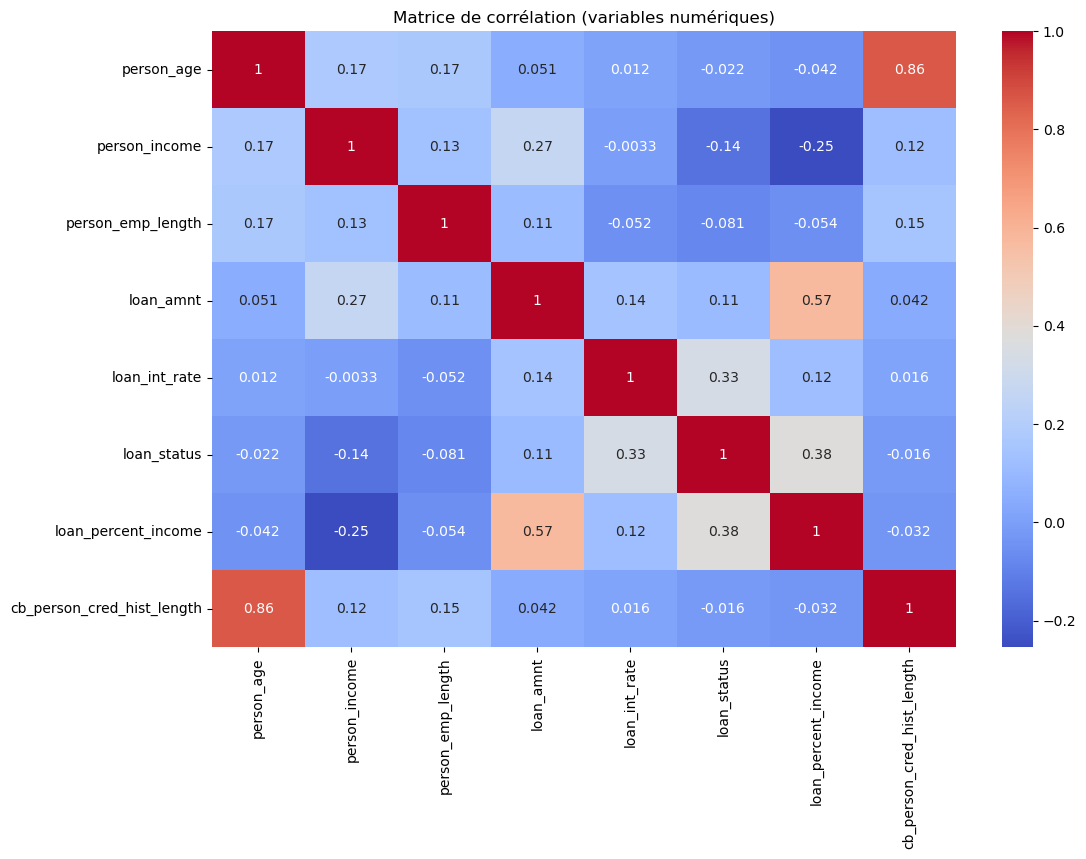

In [74]:
# Analyse numérique-numérique : matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(dfcpy.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation (variables numériques)")
plt.show()

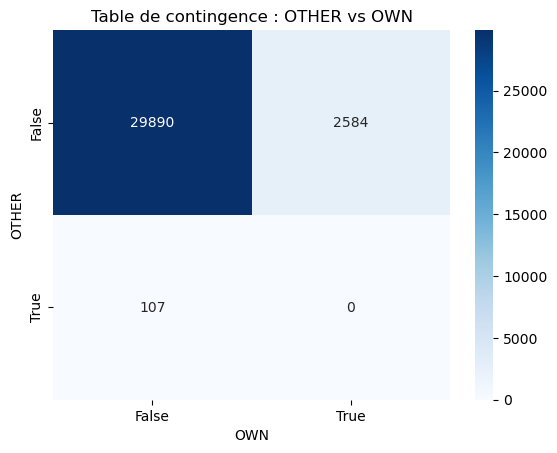

In [75]:
# Analyse catégorielle-catégorielle : heatmap de contingence entre deux variables catégorielles
cat_cols = dfcpy.select_dtypes(include=['bool']).columns
if len(cat_cols) >= 2:
    contingency = pd.crosstab(dfcpy[cat_cols[0]], dfcpy[cat_cols[1]])
    sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Table de contingence : {cat_cols[0]} vs {cat_cols[1]}")
    plt.xlabel(cat_cols[1])
    plt.ylabel(cat_cols[0])
    plt.show()

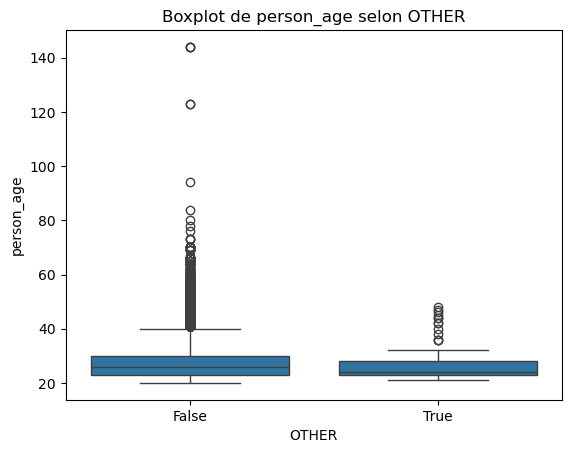

In [76]:
# Analyse catégorielle-numérique : boxplot d'une variable numérique selon une variable catégorielle
num_col = dfcpy.select_dtypes(include=[np.number]).columns[0]
cat_col = cat_cols[0]
sns.boxplot(x=cat_col, y=num_col, data=dfcpy)
plt.title(f"Boxplot de {num_col} selon {cat_col}")
plt.show()

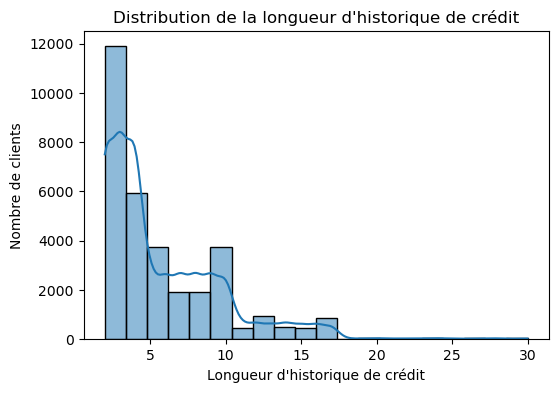

In [77]:
# Distribution de la longueur d'historique de crédit
plt.figure(figsize=(6, 4))
sns.histplot(dfcpy['cb_person_cred_hist_length'], bins=20, kde=True)
plt.title("Distribution de la longueur d'historique de crédit")
plt.xlabel("Longueur d'historique de crédit")
plt.ylabel("Nombre de clients")
plt.show()

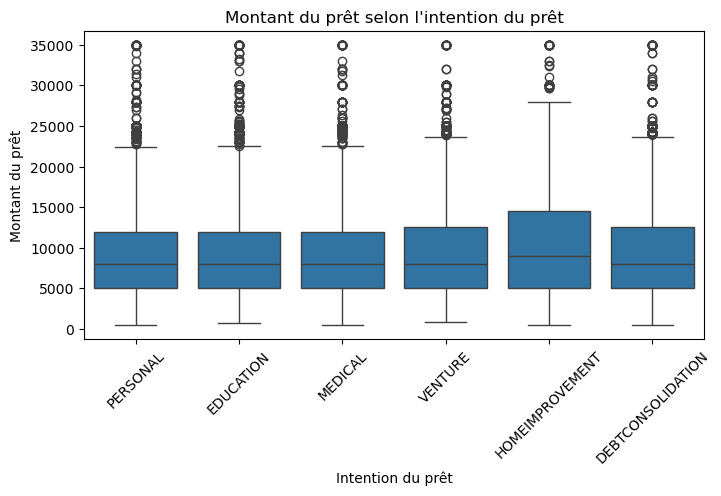

In [78]:
# Boxplot du montant du prêt selon l'intention du prêt
plt.figure(figsize=(8, 4))
sns.boxplot(x='loan_intent', y='loan_amnt', data=data)
plt.title("Montant du prêt selon l'intention du prêt")
plt.xlabel("Intention du prêt")
plt.ylabel("Montant du prêt")
plt.xticks(rotation=45)
plt.show()

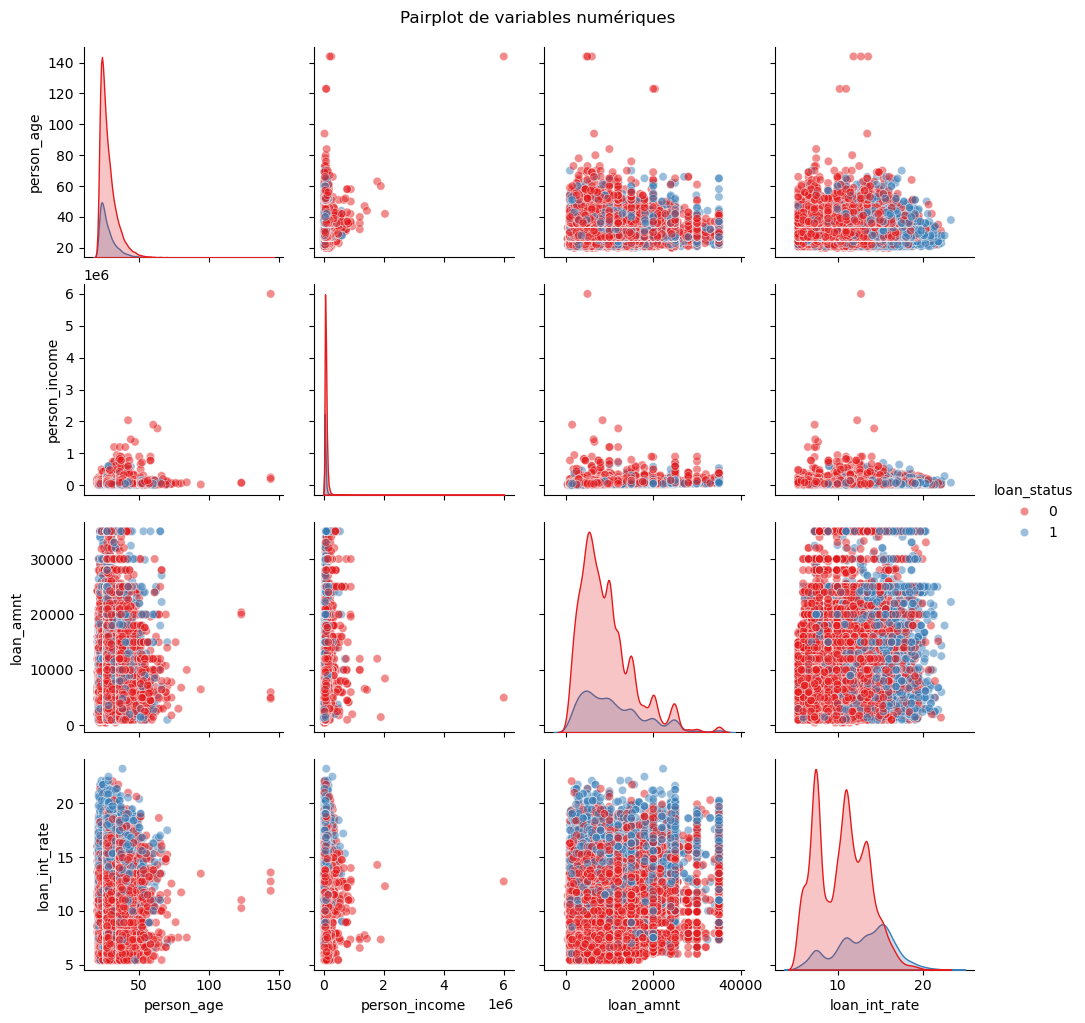

In [79]:
# Pairplot sur quelques variables numériques
sns.pairplot(dfcpy, vars=['person_age', 'person_income', 'loan_amnt', 'loan_int_rate'], hue='loan_status', palette='Set1', plot_kws={'alpha':0.5})
plt.suptitle("Pairplot de variables numériques", y=1.02)
plt.show()

In [80]:
# On utilise le meilleur modèle trouvé précédemment (LightGBM) pour prédire la variable 'num' du jeu de données santé

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_health = health_num.drop(columns=['num', 'id'])
y_health = health_num['num']

In [81]:
# Découpage en train/test
Xh_train, Xh_test, yh_train, yh_test = train_test_split(X_health, y_health, test_size=0.2, random_state=42)

# Entraînement du modèle LightGBM
lgbm_health = LGBMClassifier()
lgbm_health.fit(Xh_train, yh_train)

# Prédiction
y_pred_health = lgbm_health.predict(Xh_test)

# Rapport de classification
print(classification_report(yh_test, y_pred_health))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 6
[LightGBM] [Info] Start training from score -0.784119
[LightGBM] [Info] Start training from score -1.249372
[LightGBM] [Info] Start training from score -2.170413
[LightGBM] [Info] Start training from score -2.206781
[LightGBM] [Info] Start training from score -3.423176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [82]:
from lazypredict.Supervised import LazyClassifier
# Entraînement avec LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(Xh_train, Xh_test, yh_train, yh_test)

print(models)

  0%|          | 0/31 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 6
[LightGBM] [Info] Start training from score -0.784119
[LightGBM] [Info] Start training from score -1.249372
[LightGBM] [Info] Start training from score -2.170413
[LightGBM] [Info] Start training from score -2.206781
[LightGBM] [Info] Start training from score -3.423176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [83]:
# Préparation des données : on encode les variables catégorielles
health_df_dummies = pd.get_dummies(health_df, drop_first=True)

# Séparation des variables explicatives et de la cible
X = health_df_dummies.drop(columns=['num', 'id'])
y = health_df_dummies['num']

# Découpage train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle LightGBM
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

# Prédiction
y_pred = lgbm.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 21
[LightGBM] [Info] Start training from score -0.784119
[LightGBM] [Info] Start training from score -1.249372
[LightGBM] [Info] Start training from score -2.170413
[LightGBM] [Info] Start training from score -2.206781
[LightGBM] [Info] Start training from score -3.423176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## Télécommunications : Quels clients risquent de se désabonner (churn) ?

In [84]:
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [85]:
churn['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [86]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
